<a href="https://colab.research.google.com/github/AuroraRhyf/Studi_Independent/blob/main/PCA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = {'feature_1': [random.uniform(0, 1) for i in range(100)],
        'feature_2': [random.uniform(0, 1) for i in range(100)],
        'feature_3': [random.uniform(0, 1) for i in range(100)],
        'feature_4': [random.uniform(0, 1) for i in range(100)],
        'feature_5': [random.uniform(0, 1) for i in range(100)],
        'feature_6': [random.uniform(0, 1) for i in range(100)],
        'feature_7': [random.uniform(0, 1) for i in range(100)],
        'feature_8': [random.uniform(0, 1) for i in range(100)],
        'feature_9': [random.uniform(0, 1) for i in range(100)],
        'feature_10': [random.uniform(0, 1) for i in range(100)],
        'label': [random.choice(['A', 'B', 'C']) for i in range(100)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.735327,0.783109,0.418712,0.024974,0.667693,0.104050,0.456975,0.374675,0.745011,0.333301,C
1,0.001430,0.046788,0.024838,0.984403,0.073142,0.713484,0.254494,0.416636,0.773243,0.581805,C
2,0.175353,0.929500,0.298584,0.861485,0.201235,0.366253,0.407217,0.950413,0.158126,0.485142,C
3,0.432244,0.448110,0.388473,0.844019,0.262564,0.106169,0.208965,0.767359,0.395568,0.256286,A
4,0.369435,0.488467,0.448213,0.471432,0.484584,0.391554,0.005510,0.682293,0.445611,0.786739,B


In [ ]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
x = df.loc[:, features].values

In [ ]:
y = df.loc[:,['label']].values

In [ ]:
pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.735327,0.783109,0.418712,0.024974,0.667693,0.104050,0.456975,0.374675,0.745011,0.333301
1,0.001430,0.046788,0.024838,0.984403,0.073142,0.713484,0.254494,0.416636,0.773243,0.581805
2,0.175353,0.929500,0.298584,0.861485,0.201235,0.366253,0.407217,0.950413,0.158126,0.485142
3,0.432244,0.448110,0.388473,0.844019,0.262564,0.106169,0.208965,0.767359,0.395568,0.256286
4,0.369435,0.488467,0.448213,0.471432,0.484584,0.391554,0.005510,0.682293,0.445611,0.786739


In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.153669,0.204805
1,0.031110,0.172670
2,0.312210,-0.573771
3,0.068361,-0.293421
4,0.135108,-0.070708


In [ ]:
df[['label']].head()

,label
0,C
1,C
2,C
3,A
4,B


In [ ]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,0.153669,0.204805,C
1,0.031110,0.172670,C
2,0.312210,-0.573771,C
3,0.068361,-0.293421,A
4,0.135108,-0.070708,B


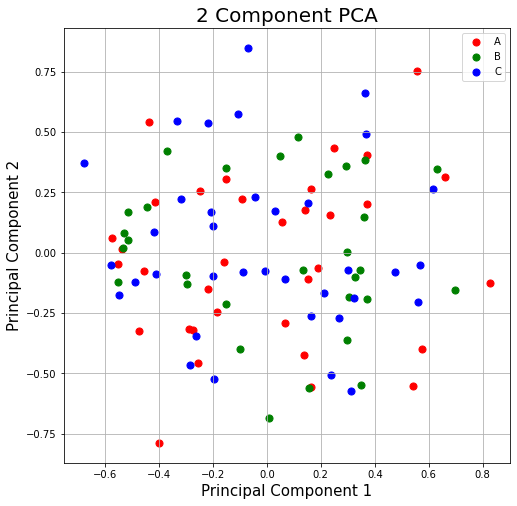

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()